In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import numpy as np
import pandas as pd

In [11]:
nsl_train= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KDDTrain+.txt')
nsl_test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KDDTest+.txt')
print(nsl_train)
print('==================')
print(nsl_test)

        0  tcp  ftp_data   SF   491   0.1  0.2  0.3  0.4  0.5  ...  0.17  \
0       0  udp     other   SF   146     0    0    0    0    0  ...  0.00   
1       0  tcp   private   S0     0     0    0    0    0    0  ...  0.10   
2       0  tcp      http   SF   232  8153    0    0    0    0  ...  1.00   
3       0  tcp      http   SF   199   420    0    0    0    0  ...  1.00   
4       0  tcp   private  REJ     0     0    0    0    0    0  ...  0.07   
...    ..  ...       ...  ...   ...   ...  ...  ...  ...  ...  ...   ...   
125967  0  tcp   private   S0     0     0    0    0    0    0  ...  0.10   
125968  8  udp   private   SF   105   145    0    0    0    0  ...  0.96   
125969  0  tcp      smtp   SF  2231   384    0    0    0    0  ...  0.12   
125970  0  tcp    klogin   S0     0     0    0    0    0    0  ...  0.03   
125971  0  tcp  ftp_data   SF   151     0    0    0    0    0  ...  0.30   

        0.03  0.17.1  0.00.6  0.00.7  0.00.8  0.05  0.00.9   normal  20  
0       0.60 

In [12]:
columns = (['duration','protocol_type','service','flag',
'src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root',
'num_file_creations','num_shells','num_access_files','num_outbound_cmds',
'is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate',
'rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate',
'dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate',
'dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate',
'attack','level'])

In [13]:
nsl_train.columns=columns
nsl_test.columns=columns

In [14]:
nsl_train.head()
nsl_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


In [15]:
# Check for duplicate rows in the DataFrame
duplicates = nsl_train[nsl_train.duplicated()]

# If duplicates exist, `duplicates` will contain the duplicated rows
# If no duplicates exist, `duplicates` will be an empty DataFrame

# Display duplicates
if not duplicates.empty:
    print("Duplicates found:")
    print(duplicates)
else:
    print("No duplicates found.")


No duplicates found.


In [16]:
# Merge the datasets
data = pd.concat([nsl_train, nsl_test])
data.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [18]:
data.shape

(148515, 43)

In [19]:
data.isna().sum()

,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
land,0
wrong_fragment,0
urgent,0
hot,0


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148515 entries, 0 to 22542
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     148515 non-null  int64  
 1   protocol_type                148515 non-null  object 
 2   service                      148515 non-null  object 
 3   flag                         148515 non-null  object 
 4   src_bytes                    148515 non-null  int64  
 5   dst_bytes                    148515 non-null  int64  
 6   land                         148515 non-null  int64  
 7   wrong_fragment               148515 non-null  int64  
 8   urgent                       148515 non-null  int64  
 9   hot                          148515 non-null  int64  
 10  num_failed_logins            148515 non-null  int64  
 11  logged_in                    148515 non-null  int64  
 12  num_compromised              148515 non-null  int64  
 13  root_

In [21]:
data.attack.unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl', 'saint', 'mscan', 'apache2',
       'snmpgetattack', 'processtable', 'httptunnel', 'ps', 'snmpguess',
       'mailbomb', 'named', 'sendmail', 'xterm', 'worm', 'xlock',
       'xsnoop', 'sqlattack', 'udpstorm'], dtype=object)

In [22]:
#Encoding Normal as 1, else 0
# Define a lambda function to map values to 1 if they are in the specified list, otherwise 0
trained_attack = data['attack'].map(lambda a: 1 if a in ['normal'] else 0)

# Create a new column 'attack_state' based on the mapped values
data['attack_state'] = trained_attack

In [23]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_state
0,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15,1
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19,0
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21,1
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21,1
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21,0


In [24]:
# Check for duplicates
duplicates1 = data[data.duplicated()]

# If duplicates exist, `duplicates` will contain the duplicated rows
# If no duplicates exist, `duplicates` will be an empty DataFrame

# Display duplicates
if not duplicates1.empty:
    print("Duplicates found:")
    print(duplicates1)

    # Print the shape of the duplicates
    print("\nShape of duplicates:")
    print(duplicates1.shape)

    # Drop duplicate rows
    data_no_duplicates = data.drop_duplicates()

    # Print the shape of the DataFrame after dropping duplicates
    print("\nShape of DataFrame after dropping duplicates:")
    print(data_no_duplicates.shape)
else:
    print("No duplicates found.")

Duplicates found:
       duration protocol_type   service flag  src_bytes  dst_bytes  land  \
107           0           tcp   private  REJ          0          0     0   
165           0           tcp   private   S0          0          0     0   
180           0           udp  domain_u   SF         44         44     0   
234           0          icmp     ecr_i   SF       1480          0     0   
240           0           udp  domain_u   SF         44         44     0   
...         ...           ...       ...  ...        ...        ...   ...   
22466         0           tcp   private   S0          0          0     0   
22484         0          icmp     ecr_i   SF       1032          0     0   
22527         0          icmp     ecr_i   SF       1032          0     0   
22537         0          icmp     ecr_i   SF       1032          0     0   
22541         0           udp  domain_u   SF         42         42     0   

       wrong_fragment  urgent  hot  ...  dst_host_diff_srv_rate  \
10

In [25]:
data=data_no_duplicates

In [26]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_state
0,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,1
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,0
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,1
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,1
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22536,1,tcp,smtp,SF,2599,293,0,0,0,0,...,0.13,0.00,0.00,0.00,0.00,0.26,0.00,mailbomb,11,0
22538,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal,21,1
22539,0,tcp,http,SF,317,938,0,0,0,0,...,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal,21,1
22540,0,tcp,http,SF,54540,8314,0,0,0,2,...,0.00,0.00,0.00,0.00,0.00,0.07,0.07,back,15,0


In [27]:
print(data['attack_state'].value_counts())

attack_state
1    76966
0    70939
Name: count, dtype: int64


In [29]:
from sklearn.preprocessing import LabelEncoder
# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
print(f"Categorical columns: {categorical_columns}")

Categorical columns: Index(['protocol_type', 'service', 'flag', 'attack'], dtype='object')


In [32]:
# Initialize LabelEncoder
encoder = LabelEncoder()
# Apply LabelEncoder to all categorical columns
for col in categorical_columns:
    data[col] = encoder.fit_transform(data[col])

print("DataFrame after Label Encoding:")
print(data)

DataFrame after Label Encoding:
       duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0             0              2       44     9        146          0     0   
1             0              1       49     5          0          0     0   
2             0              1       24     9        232       8153     0   
3             0              1       24     9        199        420     0   
4             0              1       49     1          0          0     0   
...         ...            ...      ...   ...        ...        ...   ...   
22536         1              1       54     9       2599        293     0   
22538         0              1       54     9        794        333     0   
22539         0              1       24     9        317        938     0   
22540         0              1       24     9      54540       8314     0   
22542         0              1       57     1          0          0     0   

       wrong_fragment  urgent  hot  ...  ds

In [37]:
data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack', 'level', 'attack_state'],
      dtype='object')

In [38]:
# List of features to drop
features_to_drop = ['num_root','num_failed_logins','num_file_creations','root_shell','num_shells','num_access_files',
                   'is_host_login','land','urgent','su_attempted','num_outbound_cmds']

# Drop the specified features
data_dropped = data.drop(columns=features_to_drop)

print("DataFrame after dropping specified features:")
print(data_dropped)

DataFrame after dropping specified features:
       duration  protocol_type  service  flag  src_bytes  dst_bytes  \
0             0              2       44     9        146          0   
1             0              1       49     5          0          0   
2             0              1       24     9        232       8153   
3             0              1       24     9        199        420   
4             0              1       49     1          0          0   
...         ...            ...      ...   ...        ...        ...   
22536         1              1       54     9       2599        293   
22538         0              1       54     9        794        333   
22539         0              1       24     9        317        938   
22540         0              1       24     9      54540       8314   
22542         0              1       57     1          0          0   

       wrong_fragment  hot  logged_in  num_compromised  ...  \
0                   0    0          0  

In [39]:
data=data_dropped

In [40]:
data.isna().sum()

,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
wrong_fragment,0
hot,0
logged_in,0
num_compromised,0


In [41]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,wrong_fragment,hot,logged_in,num_compromised,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_state
0,0,2,44,9,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.0,0.00,16,15,1
1,0,1,49,5,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.0,0.00,14,19,0
2,0,1,24,9,232,8153,0,0,1,0,...,0.00,0.03,0.04,0.03,0.01,0.0,0.01,16,21,1
3,0,1,24,9,199,420,0,0,1,0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,16,21,1
4,0,1,49,1,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.0,1.00,14,21,0


In [48]:
x = data.drop(columns=['attack_state'])
y = data['attack_state']
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (147905, 32)
Shape of y: (147905,)


In [49]:
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame and 'attack_state' is the target variable
X = data.drop(columns=['attack_state'])  # Independent variables
y = data['attack_state']                 # Dependent variable

# Optional: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the datasets
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X: (147905, 32)
Shape of y: (147905,)
Shape of X_train: (118324, 32)
Shape of X_test: (29581, 32)
Shape of y_train: (118324,)
Shape of y_test: (29581,)


In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation results
print("Random Forest Classifier Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)



Random Forest Classifier Accuracy: 0.9999661945167506

Confusion Matrix:
 [[14164     1]
 [    0 15416]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     14165
           1       1.00      1.00      1.00     15416

    accuracy                           1.00     29581
   macro avg       1.00      1.00      1.00     29581
weighted avg       1.00      1.00      1.00     29581



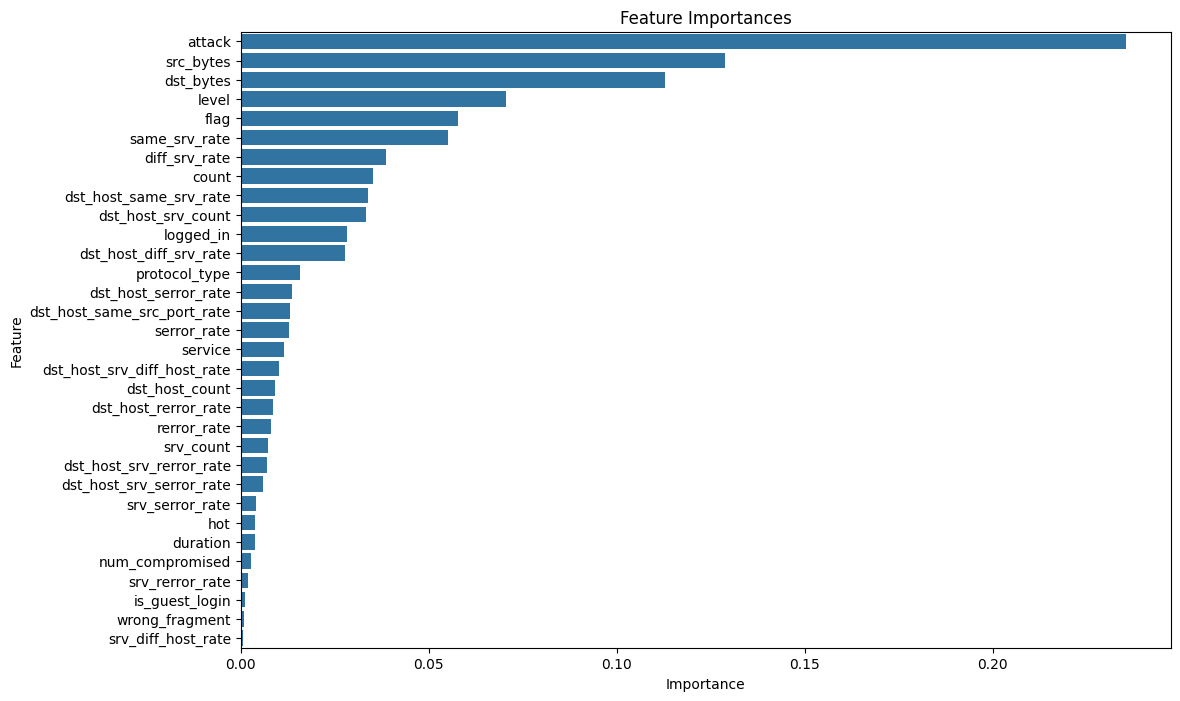

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = rf_model.feature_importances_
features = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()


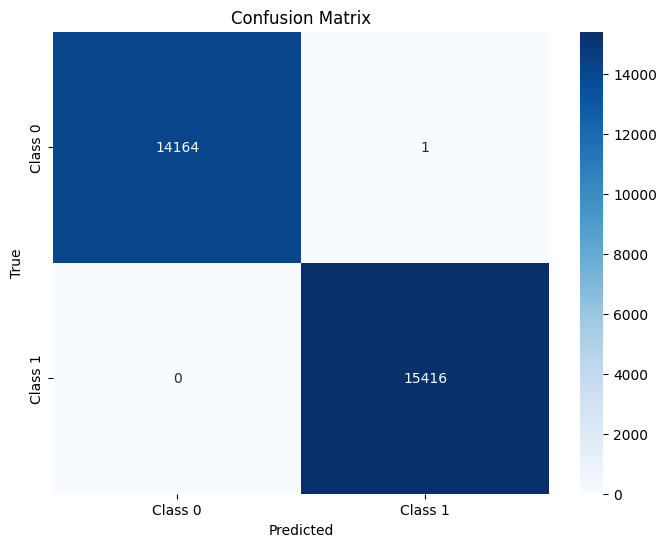

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


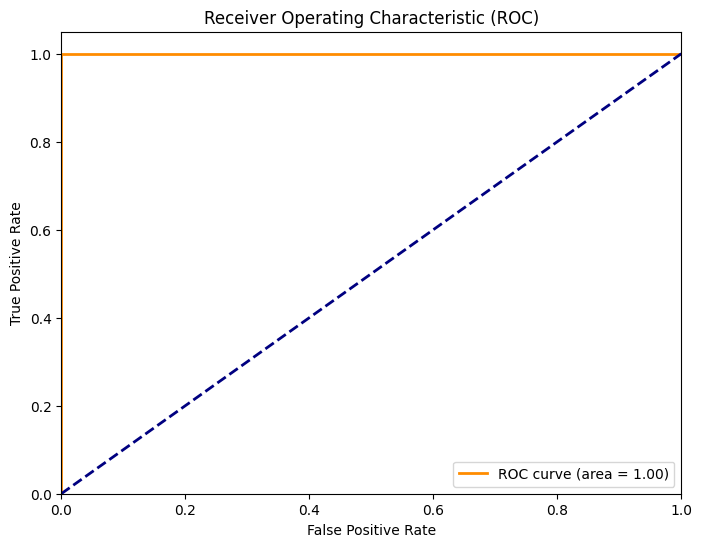

In [53]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute ROC curve and ROC area
y_probs = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


In [54]:
pip install xgboost


In [55]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [56]:
# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(eval_metric='mlogloss', use_label_encoder=False, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:10:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [57]:
# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation results
print("XGBoost Classifier Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


XGBoost Classifier Accuracy: 1.0

Confusion Matrix:
 [[14165     0]
 [    0 15416]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     14165
           1       1.00      1.00      1.00     15416

    accuracy                           1.00     29581
   macro avg       1.00      1.00      1.00     29581
weighted avg       1.00      1.00      1.00     29581



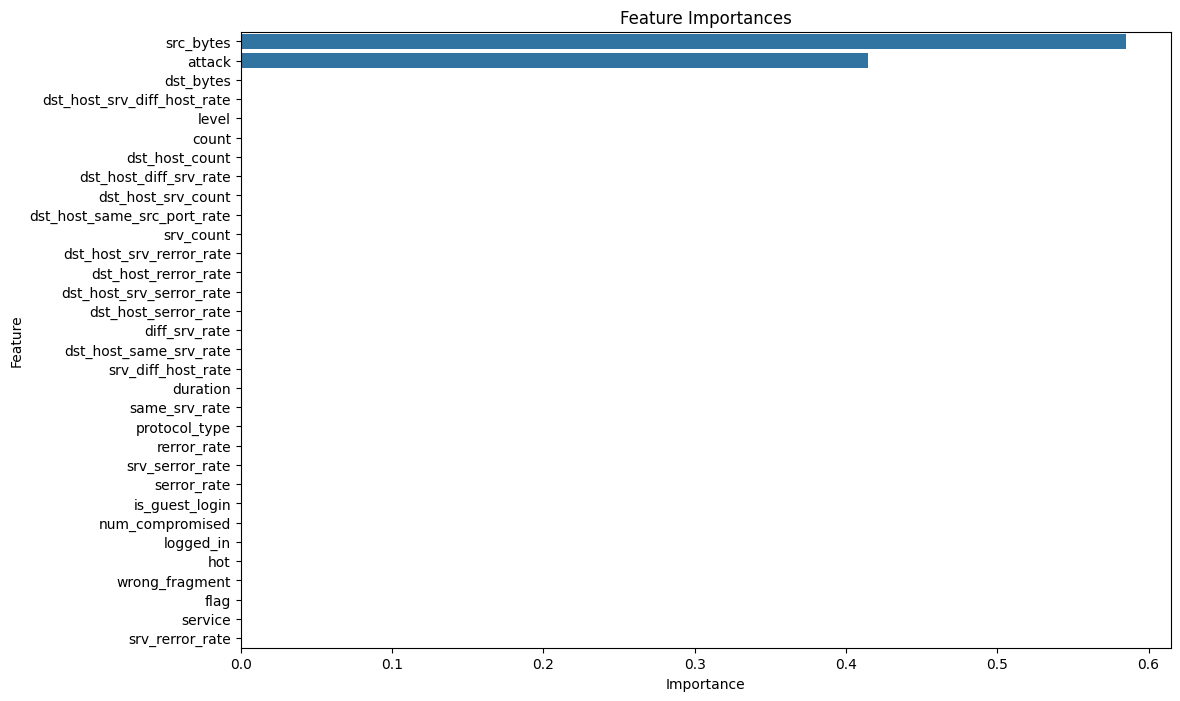

In [58]:
# Get feature importances
importances = xgb_model.feature_importances_
features = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()


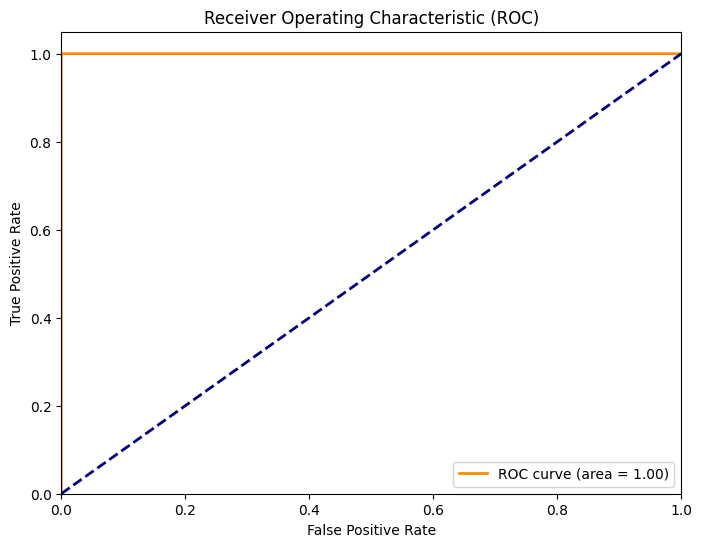

In [59]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute ROC curve and ROC area
y_probs = xgb_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()
